# Lab Assignment 6

## Outline of lab:
1. Use **bowtie2** to align the llumina MiSeq reads from a sequencing run of _Shewanella oneidensis_ to the human genome, filtering the reads for contamination from human cells(Friend Jamie's DNA)
2. USe **bowtie2** to align the filtred reads to the _S. oneidensis_ reference genome
3. Use **samtools** to calculate coverage and **matplotlib** to plot the results
4. Determine biological sex of Jamie(human DNA who contaminated the reads

# 1. Align the Illumina reads to the human genome
**bowtie2 -p4 --very-fast --no-unal -x /data/hg19/hg19 \ -U /data/lab6/illumina_reads.fastq reads.fastq -S output.sam --un unaligned.fastq**

Output on terminal:

```
1124714 reads; of these:
 
 1124714 (100.00%) were unpaired; of these:
    
    1028379 (91.43%) aligned 0 times
    
    87274 (7.76%) aligned exactly 1 time
    
    9061 (0.81%) aligned >1 times

8.57% overall alignment rate
```

## If you use the --un unaligned.fastq option, what will unaligned.fastq contain?
--un discard the unaligned reads. Thus unaligned.fastq contains human(friend's) DNA that contaminated the bacteria sample

## What percentage of your sequencing library came from contaminating human DNA?
8.57%

## 2. Align the reads to the S. oneidensisreference genome
**bowtie2 -p 4 --very-fast --no-unal -x /data/lab6/shewanella_oneidensis_mr-1 \ -U unaligned.fastq -S output2.sam --un unaligned2.fastq**

Output on terminal:
```
1028379 reads; of these:
  1028379 (100.00%) were unpaired; of these:
    299560 (29.13%) aligned 0 times
    687571 (66.86%) aligned exactly 1 time
    41248 (4.01%) aligned >1 times
70.87% overall alignment rate
```

## If you use the --un unaligned.fastq option, what will unaligned.fastq contain?
It contains the reads from illumina that did not align to the _S. oneidensis MR-1_ reference genome in the bowtie database.

## What percentage of your filtered library didn’t align to the reference genome?
100%-64.80% = 29.13% 
Thus 29.13% did not align to the reference genome.

## If you use --very-sensitive instead of --very-fast, does this percentage increase or decrease?
**bowtie2 -p 4 --very-sensitive --no-unal -x /data/lab6/shewanella_oneidensis_mr-1 \ -U unaligned.fastq -S output2.sam --un unaligned2.fastq**

Output on terminal:
```
1028379 reads; of these:
  1028379 (100.00%) were unpaired; of these:
    298112 (28.99%) aligned 0 times
    688180 (66.92%) aligned exactly 1 time
    42087 (4.09%) aligned >1 times
71.01% overall alignment rate
```
The percentage of alignment goes up a little(0.14%).

# 3. Coverage plot
Use **samtools** to calculate coverage:

Convert SAM file to BAM file:
```
samtools view -b output2.sam > output2.bam
```
Sorts BAM file by coordinates:
```
samtools sort output2.bam > output2.sorted.bam
```
Generates an index which facilitates random access of the BAM file by alignment coordinates.:
```
samtools index output2.sorted.bam
```
Generates a list of coordinates in a genome and the number of times a read aligned to that position:
```
samtools depth -a output2.sorted.bam > pileup2.tab
```


In [1]:
dat = open("pileup2.tab","r")
list1 = []
for line in dat:
    column3 = line.split('\t')
    list1.append(int(column3[2]))
    
# Determine the minimum, maximum, and mean coverage for all positions

import numpy

mean = numpy.mean(list1)
print(mean)
max = numpy.amax(list1)
print(max)
min = numpy.amin(list1)
print(min)

37.03830306625343
281
0


The filtered library has a mean depth of coverage 37.0383, maximum depth of coverage 281, and minimum depth of coverage 0.

### Graph of Depth of Coverage against Position in Genome

Text(0, 0.5, 'Depth of Coverage')

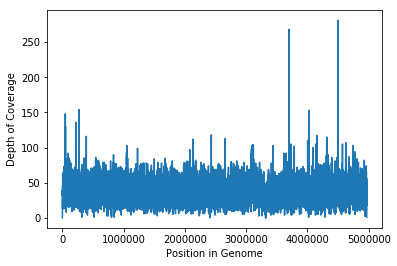

In [8]:
Depth of Coverage against Position in Genome¶import matplotlib.pyplot as plt

plt.plot(list1)
plt.xlabel('Position in Genome') 
plt.ylabel('Depth of Coverage')

The highest coverage exists between 3000000 and 5000000.

## Histogram of Depth of coverage against Count

Text(0, 0.5, 'Count')

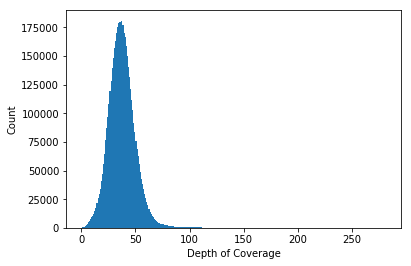

In [3]:
plt.hist(list1, 281)
plt.xlabel('Depth of Coverage') 
plt.ylabel('Count')

The Depth of Coverage of the bacterial genome shows a symmetrical distribution, slightly skewed to the right.

# 4. Determine Biological Sex of Jamie
The length of each human chromosome from the reference genome is obtained [here.](https://www.ncbi.nlm.nih.gov/grc/human/data)

In [2]:
# Open the tab file which contains alignment of Jamie's DNA to the human reference genome
ext1 = open("../new2.tab","r")

# Add up the depth of coverages for each chromosome
list3 = {}
for line in ext1:
    row = line.split('\t')
    if row[0] in list3:
        list3[row[0]] = list3[row[0]] + int(row[2])
    else:
        list3[row[0]] = int(row[2])
print(list3)

# Length of each chromosome from the human reference genome
chromo = [248956422,
         242193529,
         198295559,
         190214555,
         181538259,
         170805979,
         159345973,
         145138636,
         138394717,
         133797422,
         135086622,
         133275309,
         114364328,
         107043718,
         101991189,
         90338345,
         83257441,
         80373285,
         58617616,
         64444167,
         46709983,
         50818468,
         156040895,
         57227415]    

#Dictionary for depth of chromosome 1 to 24
list5 = {'chr1': 2272919, 'chr2': 2408597, 'chr3': 1967583, 'chr4': 1894437, 'chr5': 1796144,'chr6': 1693304,
         'chr7': 1567929, 'chr8': 1443026, 'chr9': 1206697, 'chr10': 1323874, 'chr11': 1325997, 'chr12': 1316961,
         'chr13': 967370, 'chr14': 890866, 'chr15': 825516, 'chr16': 797118, 'chr17': 787341, 'chr18': 754875,
         'chr19': 560775, 'chr20': 599238, 'chr21': 350957, 'chr22': 352372, 'chrX': 1508460, 'chrY': 244489}

#Average depth (total depth / length of chromosome) for each human chromosome
List4 = []
for (v1, v2) in zip(list5.values(), chromo) :
    List4.append(v1/v2)
print(List4)
    

{'chr1': 2272919, 'chr2': 2408597, 'chr3': 1967583, 'chr4': 1894437, 'chr5': 1796144, 'chr6': 1693304, 'chr7': 1567929, 'chr8': 1443026, 'chr9': 1206697, 'chr10': 1323874, 'chr11': 1325997, 'chr12': 1316961, 'chr13': 967370, 'chr14': 890866, 'chr15': 825516, 'chr16': 797118, 'chr17': 787341, 'chr18': 754875, 'chr19': 560775, 'chr20': 599238, 'chr21': 350957, 'chr22': 352372, 'chrX': 1508460, 'chrY': 244489, 'chr1_gl000191_random': 600, 'chr1_gl000192_random': 900, 'chr4_gl000193_random': 189, 'chr4_gl000194_random': 300, 'chr9_gl000199_random': 468, 'chr9_gl000200_random': 600, 'chr9_gl000201_random': 600, 'chr11_gl000202_random': 300, 'chrUn_gl000213': 300, 'chrUn_gl000214': 182, 'chrUn_gl000215': 900, 'chrUn_gl000217': 600, 'chrUn_gl000222': 807, 'chrUn_gl000223': 900, 'chrUn_gl000226': 300, 'chrUn_gl000227': 600, 'chrUn_gl000228': 898, 'chrUn_gl000233': 208, 'chrUn_gl000245': 300, 'chrUn_gl000247': 300}
[0.009129786577668601, 0.009944927141302773, 0.009922476377799264, 0.00995947444

## Graph of Average depth for each Human Chromosome

Text(0.5, 1.0, 'Average depth against Human Chromosome')

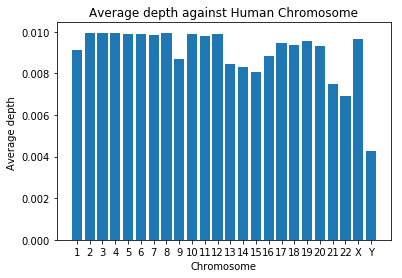

In [6]:
import matplotlib.pyplot as plt
List6 = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22',
         'X', 'Y']
plt.bar(List6, List4)
plt.ylabel('Average depth ') 
plt.xlabel('Chromosome')
plt.title('Average depth against Human Chromosome')

The presence of coverage of Y-chromosome when Jamie's DNA was aligned to human reference genome(who is also a male) shows that Jamie have the presence of Y sex chromosome. Therefore, he is male.

## Histogram of Distribution of coverage depth

Text(0.5, 1.0, 'Distribution of coverage depth')

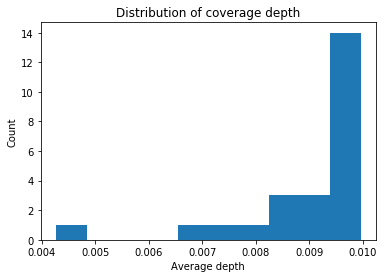

In [7]:
plt.hist(List4)
plt.ylabel('Count') 
plt.xlabel('Average depth')
plt.title('Distribution of coverage depth')

The histogram is skewed to the left, this shows that most of the chromosomes show average depth of coverage between 0.009 and 0.01.